In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
cd drive/MyDrive/Assignments

/content/drive/MyDrive/Assignments


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [38]:
data=pd.read_csv("delivery_time.csv")
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [39]:
x=data["Sorting Time"]
y=data["Delivery Time"]

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [41]:
data.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

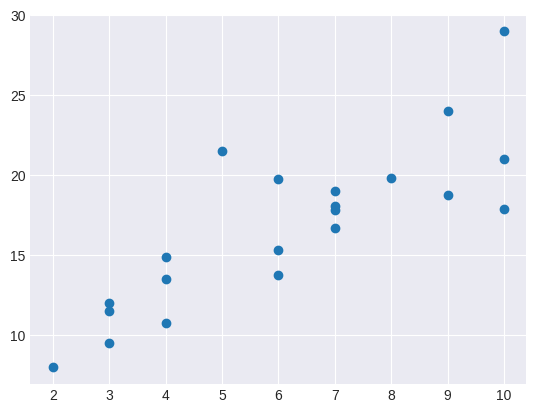

In [42]:
plt.scatter(x,y)

In [43]:
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


In [45]:
#renaming columns
data=data.rename({"Delivery Time":"DT","Sorting Time":"ST"},axis=1)

<ipython-input-46-0c3db20239c4>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


Text(0, 0.5, 'predict DT')

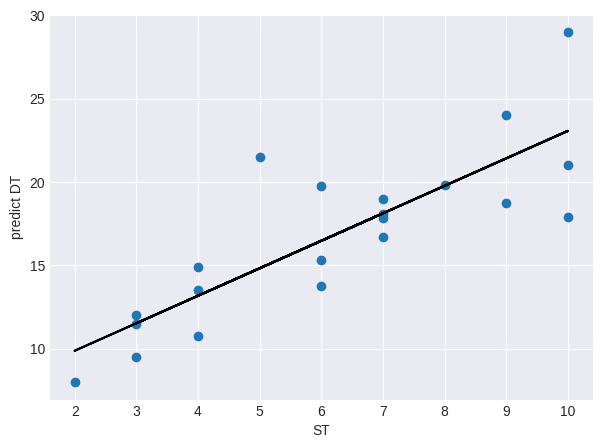

In [46]:
plt.figure(figsize=(7,5))
plt.style.use("seaborn-darkgrid")
plt.scatter(data["ST"],data["DT"])
plt.plot(data["ST"],model.predict(),color="black")
plt.xlabel("ST")
plt.ylabel("predict DT")

In [47]:
model=smf.ols("DT~ST",data=data).fit()

In [48]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           3.98e-06
Time:                        13:07:05   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.5827      1.722      3.823      0.001       2.979      10.186
ST             1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
model.rsquared

0.6822714748417231

In [50]:
#defining function for 1st and 4th
def get_values_stnad(val):
  return(val-val.mean())/val.std()

In [51]:
model.predict()

array([23.07293294, 13.17881356, 16.47685335, 21.42391304, 23.07293294,
       16.47685335, 18.12587325, 11.52979366, 23.07293294, 21.42391304,
       19.77489315, 13.17881356, 18.12587325, 11.52979366, 11.52979366,
       13.17881356, 16.47685335, 18.12587325,  9.88077377, 18.12587325,
       14.82783346])

In [52]:
#assumption 1

<ipython-input-53-57a4e67ef4e0>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


Text(0, 0.5, 'Error')

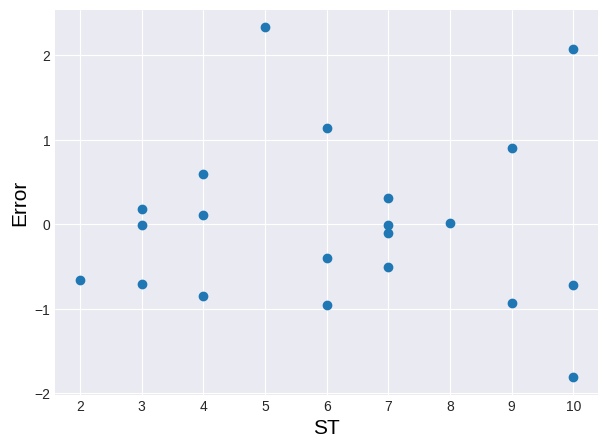

In [53]:
plt.figure(figsize=(7,5))
plt.style.use("seaborn-darkgrid")
plt.scatter(data["ST"],get_values_stnad(model.resid))
plt.xlabel("ST",color="black",size="15")
plt.ylabel("Error",color="black",size="15")

<ipython-input-54-b4327bac279d>:3: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-darkgrid")


Text(0, 0.5, 'Error')

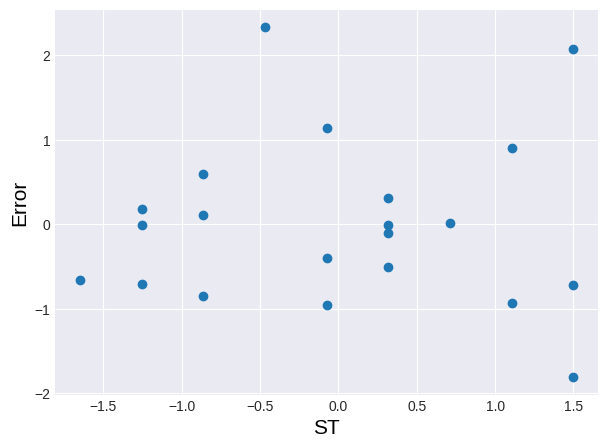

In [54]:
#Assumption 4th
plt.figure(figsize=(7,5))
plt.style.use("seaborn-darkgrid")
plt.scatter(get_values_stnad(model.fittedvalues),get_values_stnad(model.resid))
plt.xlabel("ST",color="black",size="15")
plt.ylabel("Error",color="black",size="15")

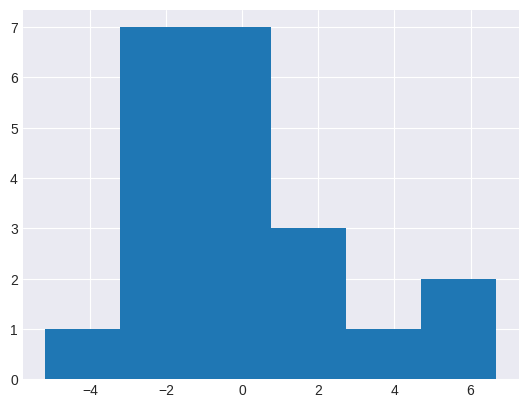

In [55]:
#error should come from noremal distribution
plt.hist(model.resid,bins=6)
plt.show()

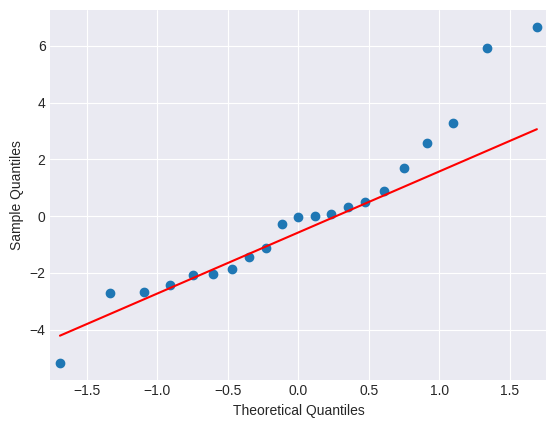

In [56]:
qqplot=sm.qqplot(model.resid,line="q")
plt.show()

In [57]:
#detecting outlier
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

In [58]:
# finding cooks distancce manually
n=2
m=20
(3*n)/m

0.3

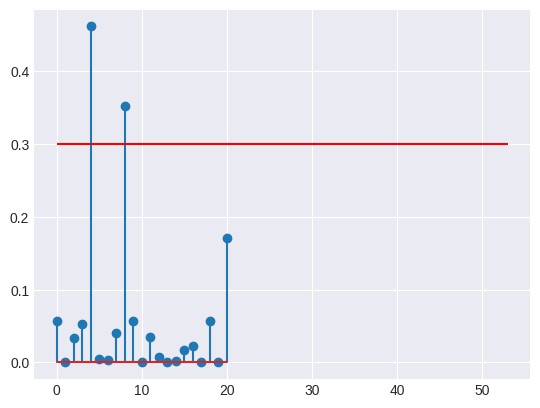

In [59]:
plt.stem(np.arange(len(data)),np.round(c,3))
plt.hlines(y=0.3,xmin=0,xmax=53,color="red")
plt.show()

In [60]:
a=np.where(c>=0.3)
a

(array([4, 8]),)

In [61]:
data1=pd.read_csv("delivery_time.csv")

In [62]:
data2=data.drop(data.index[[4,8]],axis=0).reset_index()

In [63]:
new_model=smf.ols("DT~ST",data=data2).fit()
new_model.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_stats_py.py:1736: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     DT   R-squared:                       0.714
Model:                            OLS   Adj. R-squared:                  0.697
Method:                 Least Squares   F-statistic:                     42.46
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           5.28e-06
Time:                        13:07:46   Log-Likelihood:                -42.891
No. Observations:                  19   AIC:                             89.78
Df Residuals:                      17   BIC:                             91.67
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      6.7323      1.542      4.366      0.000       3.479       9.985
ST             1.6163      0.248      6.516      0.000       1.093       2.140
==============================================================================
Omnibus:                        8.911   Durbin-Watson:                   1.401
Prob(Omnibus):                  0.012   Jarque-Bera (JB):                6.059
Skew:                           1.208   Prob(JB):                       0.0483
Kurtosis:                       4.347   Cond. No.                         17.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
new_data=pd.Series([5,8])
test_Data=pd.DataFrame(new_data,columns=["ST"])
model.predict(test_Data)

0    14.827833
1    19.774893
dtype: float64

In [33]:
new_model.predict(test_Data)

0    14.813944
1    19.662958
dtype: float64

In [ ]:
#problem 2

In [67]:
salary_hike=pd.read_csv("Salary_Data.csv")
salary_hike

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [89]:
salary_hike.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [92]:
salary_hike.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

<Axes: xlabel='YearsExperience', ylabel='Salary'>

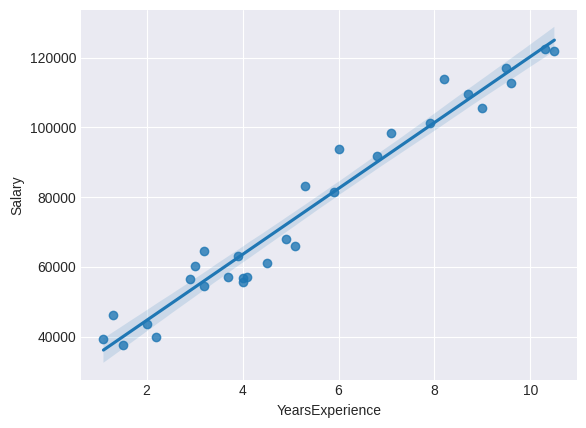

In [94]:
sns.regplot(x=salary_hike["YearsExperience"],y=salary_hike["Salary"])

In [93]:
salary_hike_model=smf.ols("Salary~YearsExperience",data=salary_hike).fit()
salary_hike_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 14 Jun 2023   Prob (F-statistic):           1.14e-20
Time:                        13:51:32   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

chacking for assumptions

In [73]:
def get_val_stand(val):
  return (val-val.mean())/val.std()

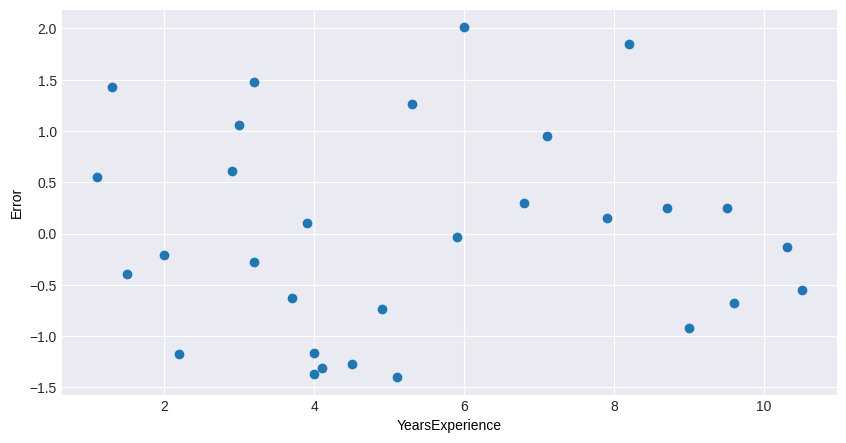

In [105]:
#Assumption 1 - error should not be dependent on features
plt.figure(figsize=(10,5))
plt.scatter(salary_hike["YearsExperience"],get_val_stand(salary_hike_model.resid))
plt.xlabel("YearsExperience",color="black")
plt.ylabel("Error",color="black")
plt.show()

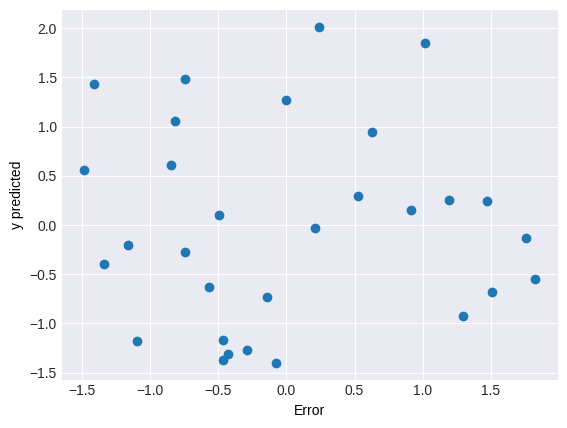

In [82]:
#Assumption 4 Error should have contant variance
plt.scatter(get_val_stand(salary_hike_model.fittedvalues),get_val_stand(salary_hike_model.resid))
plt.xlabel("Error",color="black")
plt.ylabel("y predicted",color="black")
plt.show()

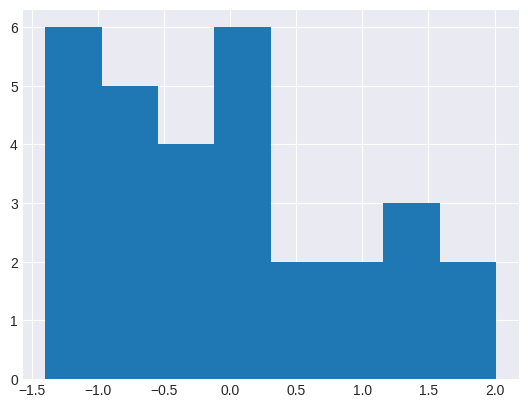

In [86]:
#Assumption 2 error should come from normal distribution
plt.hist(get_val_stand(salary_hike_model.resid),bins=8)
plt.show()

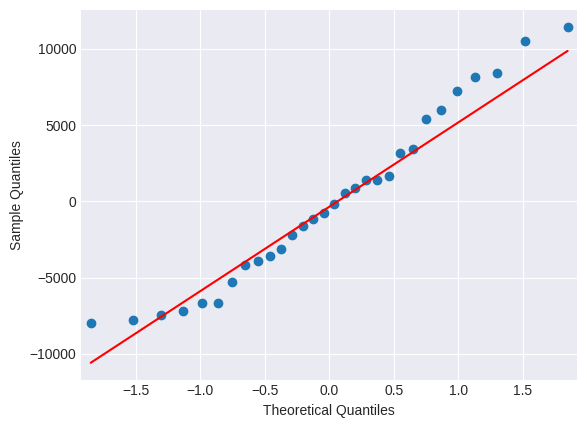

In [87]:
qqplot=sm.qqplot(salary_hike_model.resid,line="q")
plt.show()

In [88]:
salary_hike_model.predict()

array([ 36187.15875227,  38077.15121656,  39967.14368085,  44692.12484158,
        46582.11730587,  53197.09093089,  54142.08716303,  56032.07962732,
        56032.07962732,  60757.06078805,  62647.05325234,  63592.04948449,
        63592.04948449,  64537.04571663,  68317.03064522,  72097.0155738 ,
        73987.00803809,  75877.00050238,  81546.97789525,  82491.9741274 ,
        90051.94398456,  92886.932681  , 100446.90253816, 103281.8912346 ,
       108006.87239533, 110841.86109176, 115566.84225249, 116511.83848464,
       123126.81210966, 125016.80457395])

In [102]:
new_data2=pd.Series([2,1])
new_data2

0    2
1    1
dtype: int64

In [103]:
test_data2=pd.DataFrame(new_data2,columns=["YearsExperience"])


In [104]:
salary_hike_model.predict(test_data2)

0    44692.124842
1    35242.162520
dtype: float64